Dataset Link

https://ec.europa.eu/eurostat/databrowser/view/LC_LCI_R2_Q__custom_192769/bookmark/table?lang=en&bookmarkId=87c35b37-dc6a-434d-8372-d6d72aaac724


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline    
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-darkgrid') 
from pylab import rcParams  
import plotly.graph_objs as go
import cufflinks
from statsmodels.tsa.stattools import adfuller

# Ο Δείκτης Κόστους Εργασίας ή Δείκτης Μισθολογικού Κόστος (LCI)

Ο Δείκτης Εργατικού Κόστους αντικατοπτρίζει τη βραχυπρόθεσμη εξέλιξη του συνολικού κόστους, σε ωριαία βάση, των εργοδοτών που απασχολούν το εργατικό δυναμικό. 

Ο δείκτης καλύπτει όλες τις οικονομικές δραστηριότητες εκτός από τον Τομέα Α: Γεωργία, Δασοκομία και  Αλιεία,
τον Τομέα Τ: Δραστηριότητες νοικοκυριών ως εργοδοτών και τον Τομέα U: Δραστηριότητες ετερόδικων οργανισμών και φορέων.

Καλύπτονται όλοι οι υπάλληλοι του Αρχείου των Υπηρεσιών Κοινωνικών Ασφαλίσεων. Εξαιρούνται όσοι δηλώνουν ακαθάριστο μισθό
μικρότερο από το 50% του κατώτατου μισθού, όπως καθορίζεται στο διάταγμα του Υπουργείου Εργασίας και Κοινωνικών 
Ασφαλίσεων. Εξαιρούνται επίσης οι μισθοί άνω των €20.000 ευρώ το μήνα.

### Labour index for Electricity, gas, steam and air conditioning supply 

In [2]:
df= pd.read_csv('Labour cost index - monthly data.csv')
df.head(5)

,DATAFLOW,LAST UPDATE,freq,s_adj,unit,nace_r2,lcstruct,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:LC_LCI_R2_Q(1.0),15/09/22 11:00:00,Q,CA,I16,B,D11,AT,2000-Q1,63.6,NaN
1,ESTAT:LC_LCI_R2_Q(1.0),15/09/22 11:00:00,Q,CA,I16,B,D11,AT,2000-Q2,72.5,NaN
2,ESTAT:LC_LCI_R2_Q(1.0),15/09/22 11:00:00,Q,CA,I16,B,D11,AT,2000-Q3,65.9,NaN
3,ESTAT:LC_LCI_R2_Q(1.0),15/09/22 11:00:00,Q,CA,I16,B,D11,AT,2000-Q4,86.8,NaN
4,ESTAT:LC_LCI_R2_Q(1.0),15/09/22 11:00:00,Q,CA,I16,B,D11,AT,2001-Q1,67.1,NaN


In [3]:
df = df[df['geo'] == 'EL']
df = df[df['lcstruct'] == 'D11']
df = df[df['s_adj'] == 'CA']
df = df[df['unit'] == 'I16']
df = df[df['nace_r2'] == 'D'] 
# nace_r2 is specifing the economic activity
# equal to D Electricity, gas, steam and air conditioning supply 

In [4]:
df

,DATAFLOW,LAST UPDATE,freq,s_adj,unit,nace_r2,lcstruct,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
70468,ESTAT:LC_LCI_R2_Q(1.0),15/09/22 11:00:00,Q,CA,I16,D,D11,EL,2000-Q1,47.3,NaN
70469,ESTAT:LC_LCI_R2_Q(1.0),15/09/22 11:00:00,Q,CA,I16,D,D11,EL,2000-Q2,55.7,NaN
70470,ESTAT:LC_LCI_R2_Q(1.0),15/09/22 11:00:00,Q,CA,I16,D,D11,EL,2000-Q3,57.2,NaN
70471,ESTAT:LC_LCI_R2_Q(1.0),15/09/22 11:00:00,Q,CA,I16,D,D11,EL,2000-Q4,72.5,NaN
70472,ESTAT:LC_LCI_R2_Q(1.0),15/09/22 11:00:00,Q,CA,I16,D,D11,EL,2001-Q1,63.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...
70553,ESTAT:LC_LCI_R2_Q(1.0),15/09/22 11:00:00,Q,CA,I16,D,D11,EL,2021-Q2,104.9,NaN
70554,ESTAT:LC_LCI_R2_Q(1.0),15/09/22 11:00:00,Q,CA,I16,D,D11,EL,2021-Q3,113.9,NaN
70555,ESTAT:LC_LCI_R2_Q(1.0),15/09/22 11:00:00,Q,CA,I16,D,D11,EL,2021-Q4,109.6,NaN
70556,ESTAT:LC_LCI_R2_Q(1.0),15/09/22 11:00:00,Q,CA,I16,D,D11,EL,2022-Q1,100.4,NaN


In [5]:
df.reset_index(inplace=True)
df.drop(['index','s_adj', 'DATAFLOW', 'LAST UPDATE', 'freq', 'lcstruct', 'unit', 'geo', 'OBS_FLAG'], inplace=True, axis=1)
df

,nace_r2,TIME_PERIOD,OBS_VALUE
0,D,2000-Q1,47.3
1,D,2000-Q2,55.7
2,D,2000-Q3,57.2
3,D,2000-Q4,72.5
4,D,2001-Q1,63.5
...,...,...,...
85,D,2021-Q2,104.9
86,D,2021-Q3,113.9
87,D,2021-Q4,109.6
88,D,2022-Q1,100.4


In [6]:
df.rename(columns = {'TIME_PERIOD':'time'}, inplace = True)
df['time'].replace(regex=True,inplace=True, to_replace='M',value='')
df['time'] =  pd.to_datetime(df['time'], format='%Y%m', errors='ignore', infer_datetime_format=True)

In [7]:
df

,nace_r2,time,OBS_VALUE
0,D,2000-01-01,47.3
1,D,2000-04-01,55.7
2,D,2000-07-01,57.2
3,D,2000-10-01,72.5
4,D,2001-01-01,63.5
...,...,...,...
85,D,2021-04-01,104.9
86,D,2021-07-01,113.9
87,D,2021-10-01,109.6
88,D,2022-01-01,100.4


In [8]:
df.rename(columns = {'OBS_VALUE':'value'}, inplace = True)

In [9]:
df

,nace_r2,time,value
0,D,2000-01-01,47.3
1,D,2000-04-01,55.7
2,D,2000-07-01,57.2
3,D,2000-10-01,72.5
4,D,2001-01-01,63.5
...,...,...,...
85,D,2021-04-01,104.9
86,D,2021-07-01,113.9
87,D,2021-10-01,109.6
88,D,2022-01-01,100.4


Text(0.5, 1.0, 'Monthly value of LCI')

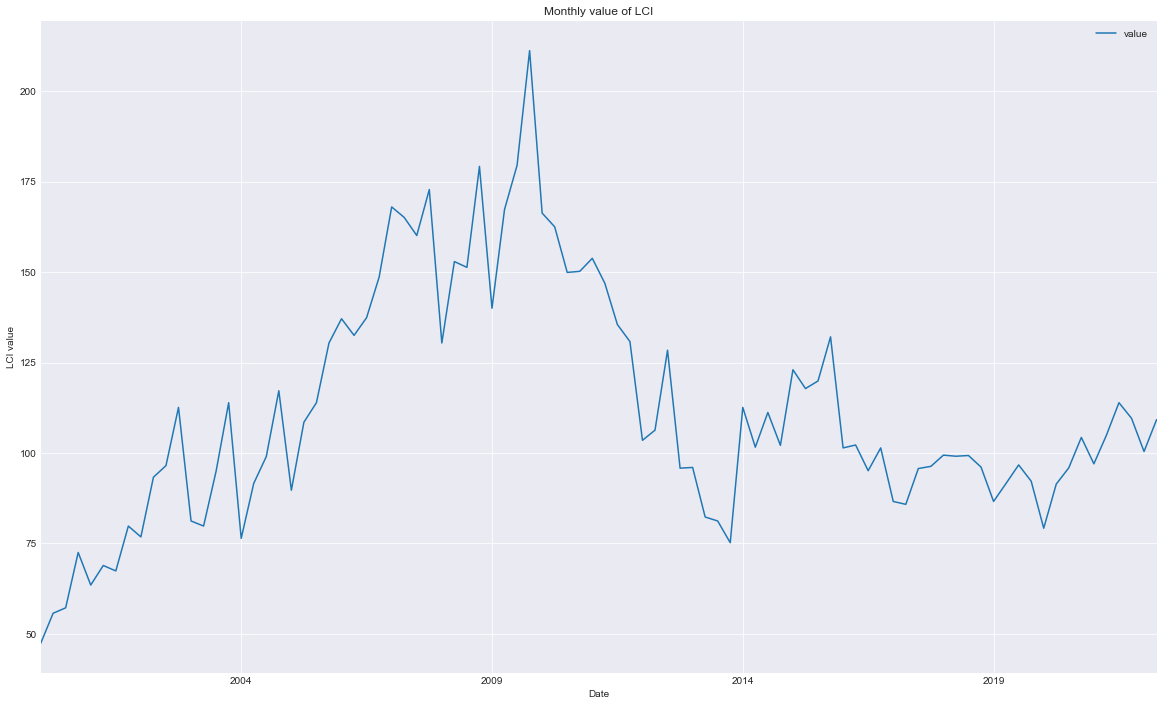

In [10]:
rcParams['figure.figsize'] = 20, 12
df.plot(x = 'time', y = 'value')
plt.xlabel('Date')
plt.ylabel('LCI value')
plt.title("Monthly value of LCI")

In [11]:
def labour_index_graph(activity):

    df= pd.read_csv('Labour cost index - monthly data.csv')
    df = df[df['geo'] == 'EL']
    df = df[df['lcstruct'] == 'D11']
    df = df[df['s_adj'] == 'CA']
    df = df[df['unit'] == 'I16']
    df = df[df['nace_r2'] == activity]
    df.reset_index(inplace=True)
    df.drop(['index','s_adj', 'DATAFLOW', 'LAST UPDATE', 'freq', 'lcstruct', 'unit', 'geo', 'OBS_FLAG'], inplace=True, axis=1)
    df.rename(columns = {'TIME_PERIOD':'time'}, inplace = True)
    df['time'].replace(regex=True,inplace=True, to_replace='M',value='')
    df['time'] =  pd.to_datetime(df['time'], format='%Y%m', errors='ignore', infer_datetime_format=True)
    df.rename(columns = {'OBS_VALUE':'value'}, inplace = True)
    print(df)
    rcParams['figure.figsize'] = 20, 12
    df.plot(x = 'time', y = 'value')
    plt.xlabel('Date')
    plt.ylabel('LCI value')
    plt.title("Monthly value of LCI")

### Labour index for Water supply: sewerage, waste management and remediation activities 

   nace_r2       time  value
0        E 2000-01-01   59.7
1        E 2000-04-01   95.9
2        E 2000-07-01  108.0
3        E 2000-10-01  143.9
4        E 2001-01-01  116.8
..     ...        ...    ...
85       E 2021-04-01  105.2
86       E 2021-07-01  100.2
87       E 2021-10-01  105.6
88       E 2022-01-01  100.4
89       E 2022-04-01  105.1

[90 rows x 3 columns]


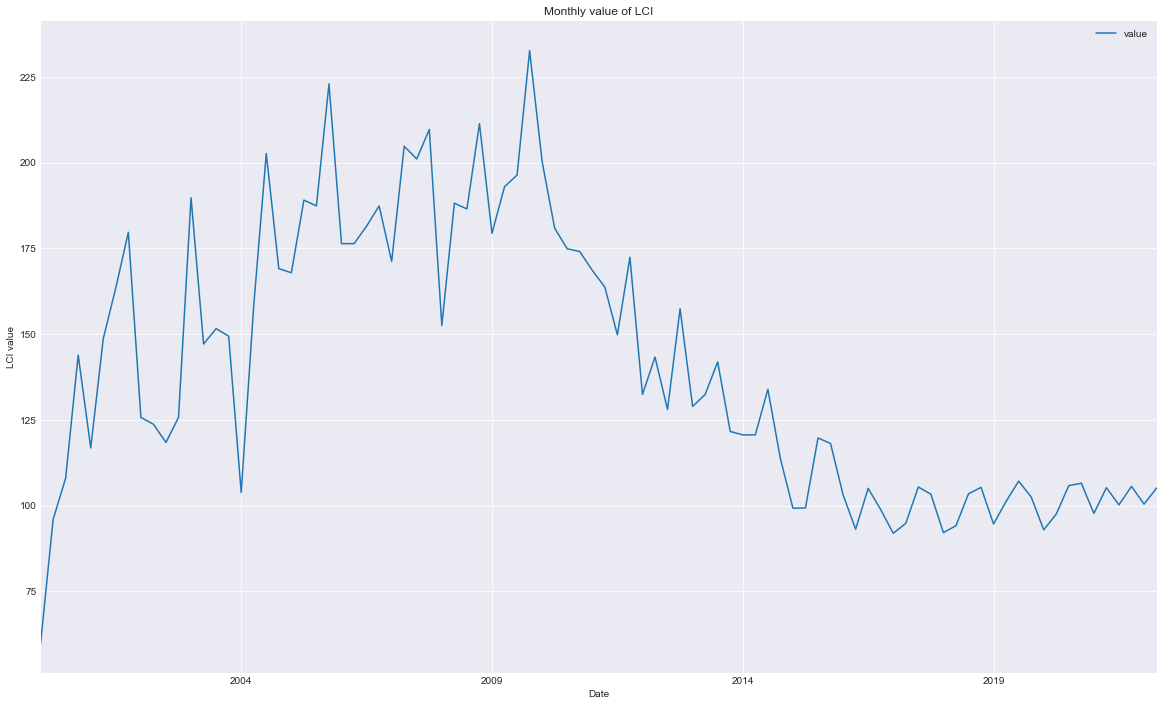

In [12]:
labour_index_graph('E')

### Labour index for Transportation and storage 

   nace_r2       time  value
0        H 2000-01-01   81.8
1        H 2000-04-01   94.2
2        H 2000-07-01   95.5
3        H 2000-10-01  110.2
4        H 2001-01-01   76.8
..     ...        ...    ...
85       H 2021-04-01  128.0
86       H 2021-07-01  122.0
87       H 2021-10-01  139.5
88       H 2022-01-01  112.8
89       H 2022-04-01  139.8

[90 rows x 3 columns]


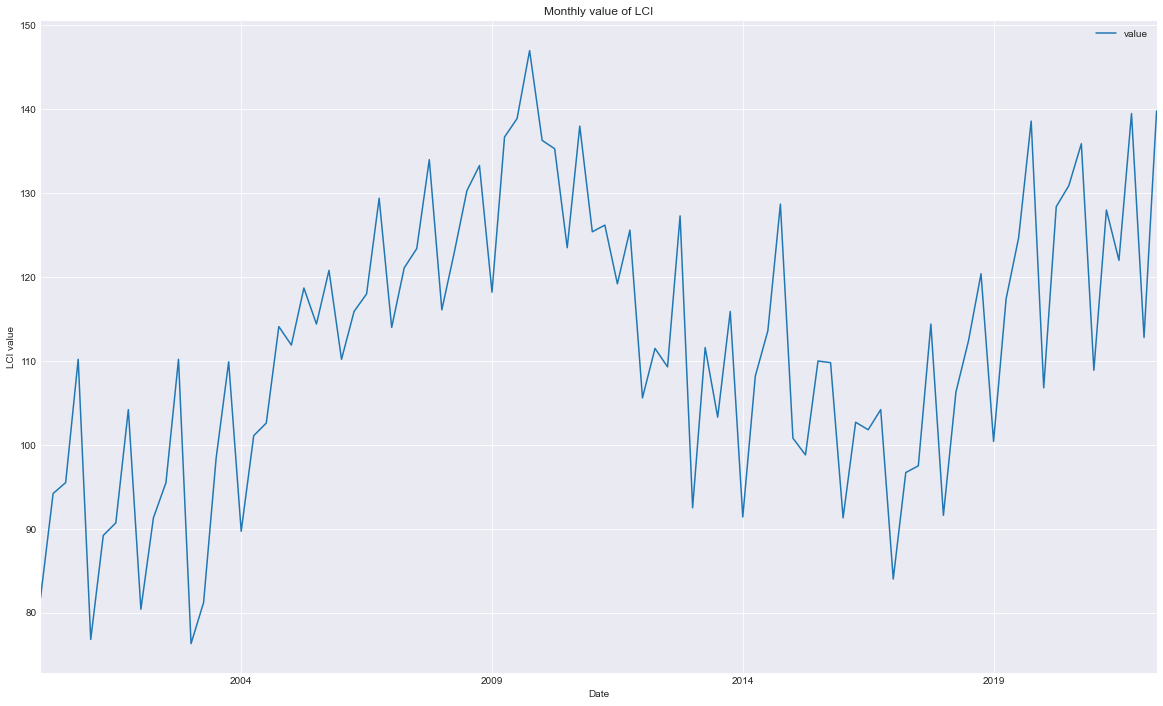

In [13]:
labour_index_graph('H')

### Labour index for Accommodation and food service activities

   nace_r2       time  value
0        I 2000-01-01  111.9
1        I 2000-04-01  125.3
2        I 2000-07-01  126.4
3        I 2000-10-01  149.2
4        I 2001-01-01  111.8
..     ...        ...    ...
85       I 2021-04-01  131.3
86       I 2021-07-01  123.6
87       I 2021-10-01  148.9
88       I 2022-01-01  121.7
89       I 2022-04-01  157.4

[90 rows x 3 columns]


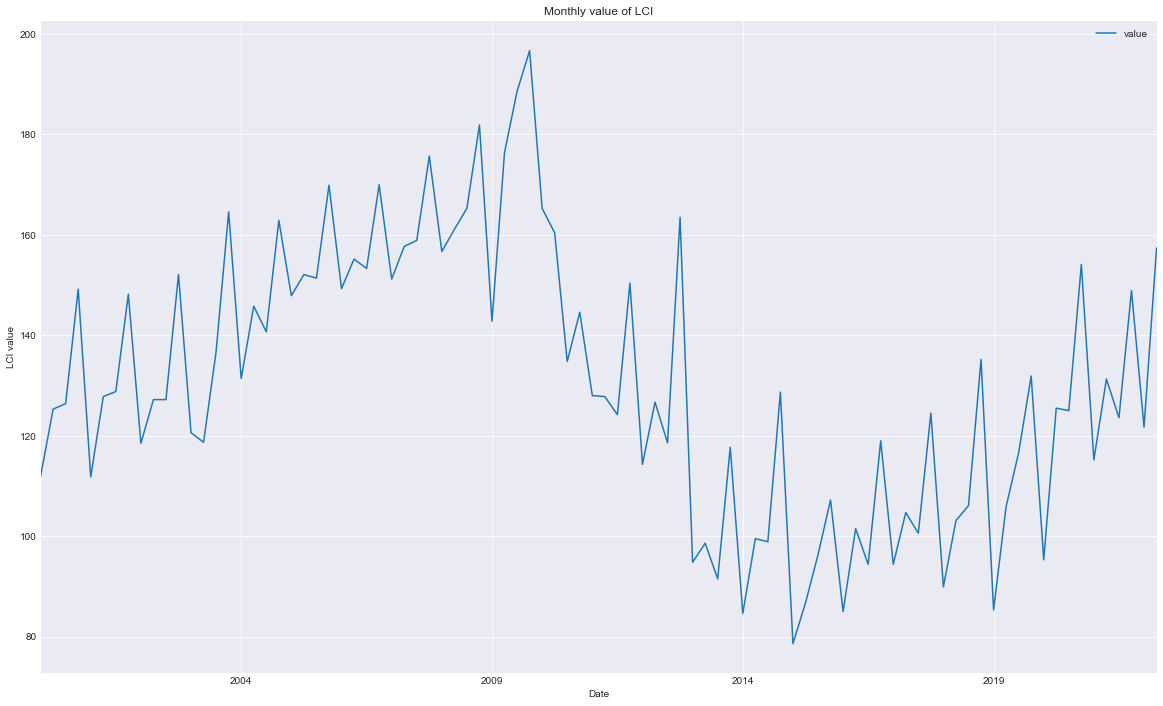

In [14]:
labour_index_graph('I')

### Labour index for Real estate activities

   nace_r2       time  value
0        L 2000-01-01   98.8
1        L 2000-04-01   44.0
2        L 2000-07-01   30.4
3        L 2000-10-01  109.8
4        L 2001-01-01  108.7
..     ...        ...    ...
85       L 2021-04-01  145.7
86       L 2021-07-01  126.2
87       L 2021-10-01  162.0
88       L 2022-01-01  117.4
89       L 2022-04-01  137.4

[90 rows x 3 columns]


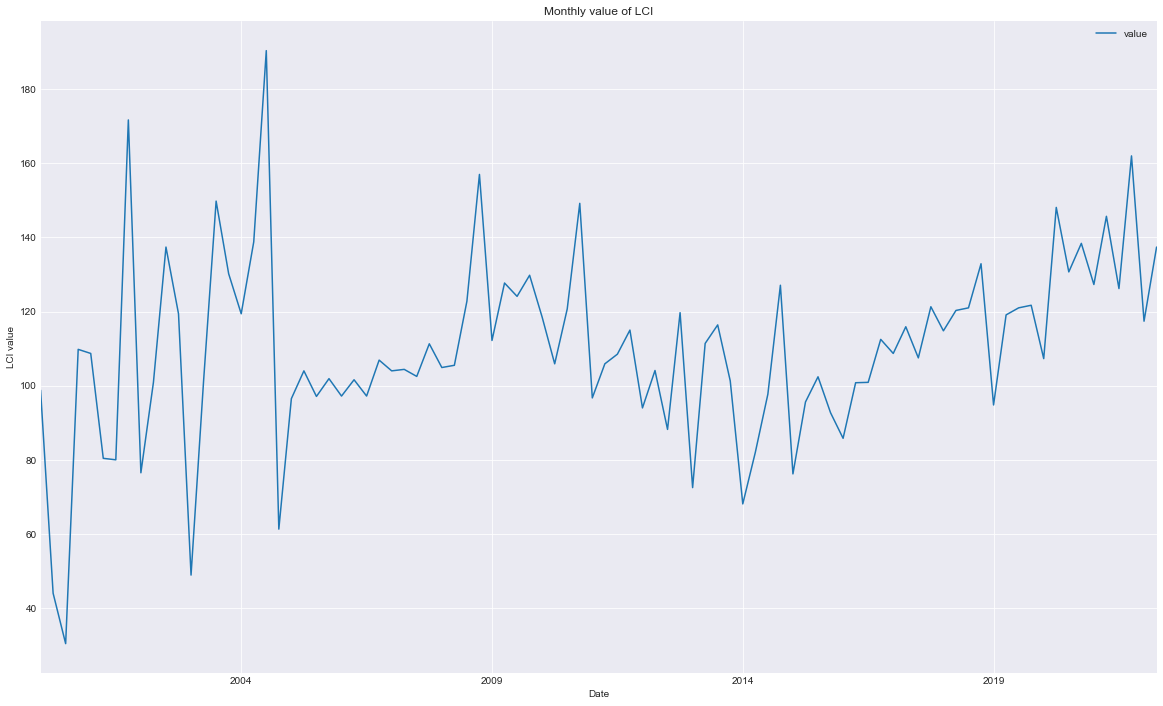

In [15]:
labour_index_graph('L')

### Labour index for Information and communication 

   nace_r2       time  value
0        J 2000-01-01   96.3
1        J 2000-04-01  113.3
2        J 2000-07-01  116.3
3        J 2000-10-01  132.9
4        J 2001-01-01  103.9
..     ...        ...    ...
85       J 2021-04-01  126.9
86       J 2021-07-01  125.4
87       J 2021-10-01  144.7
88       J 2022-01-01  112.4
89       J 2022-04-01  131.2

[90 rows x 3 columns]


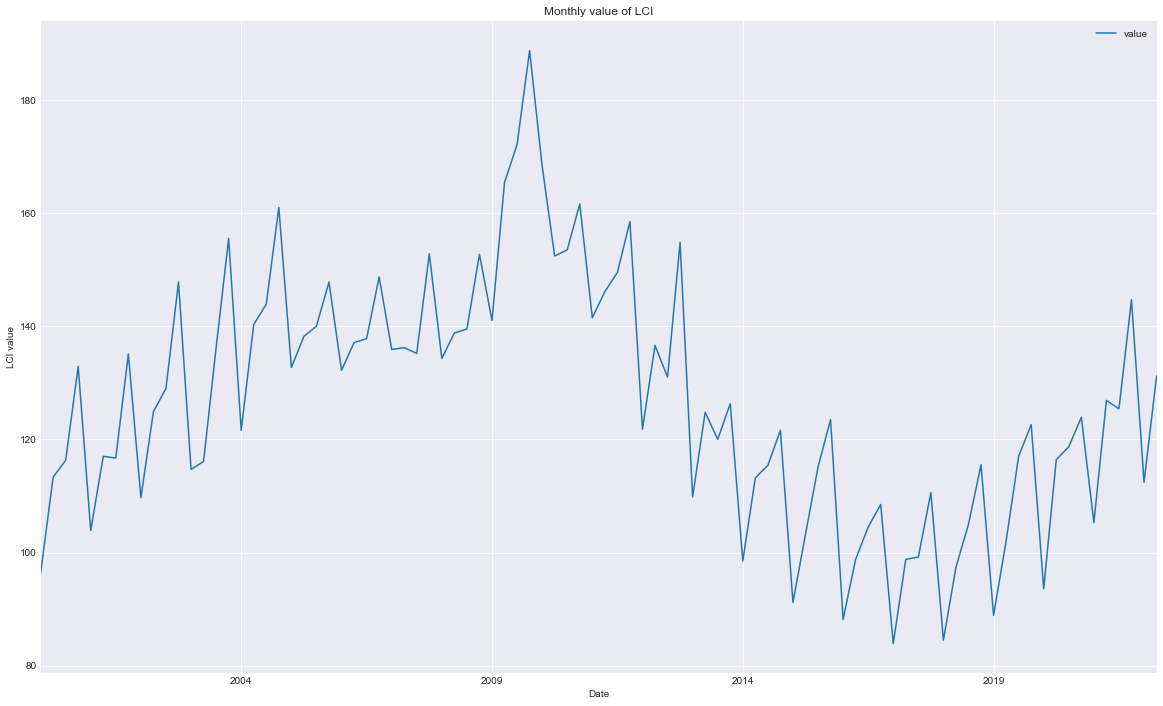

In [16]:
labour_index_graph('J')